# Import Libraries

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv('cleaned_data.csv')

In [28]:
df

,units_sold,discount_applied,revenue,clicks,impressions,conversion_rate,category,region,ad_ctr,ad_cpc,ad_spend,transaction_date_update,roi
0,134,0.14,305.54,11,65,0.17,Electronics,Europe,0.0180,0.55,9.90,Oct-2024,2986.262626
1,109,0.30,1102.19,15,201,0.07,Home Appliances,Asia,0.1589,0.40,63.56,Oct-2024,1634.093770
2,116,0.04,471.29,16,199,0.08,Toys,Asia,0.0596,1.50,89.40,Apr-2024,427.170022
3,125,0.20,980.26,12,355,0.03,Clothing,Europe,0.0444,0.44,19.54,Aug-2024,4916.683726
4,132,0.07,803.76,44,355,0.12,Books,North America,0.1270,0.53,67.31,May-2024,1094.116773
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,183,0.20,173.70,23,299,0.08,Books,North America,0.1459,0.54,78.79,Oct-2024,120.459449
4996,151,0.20,61.13,19,440,0.04,Clothing,Asia,0.1036,1.21,125.36,Jan-2024,-51.236439
4997,174,0.04,274.68,11,10,1.10,Toys,Europe,0.1758,1.16,203.93,Oct-2024,34.693277
4998,180,0.12,51.23,12,490,0.02,Books,North America,0.0853,0.28,23.88,Feb-2024,114.530988


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   units_sold               5000 non-null   int64  
 1   discount_applied         5000 non-null   float64
 2   revenue                  5000 non-null   float64
 3   clicks                   5000 non-null   int64  
 4   impressions              5000 non-null   int64  
 5   conversion_rate          5000 non-null   float64
 6   category                 5000 non-null   object 
 7   region                   5000 non-null   object 
 8   ad_ctr                   5000 non-null   float64
 9   ad_cpc                   5000 non-null   float64
 10  ad_spend                 5000 non-null   float64
 11  transaction_date_update  5000 non-null   object 
 12  roi                      5000 non-null   float64
dtypes: float64(7), int64(3), object(3)
memory usage: 507.9+ KB


# EDA

## Heatmap Correlation

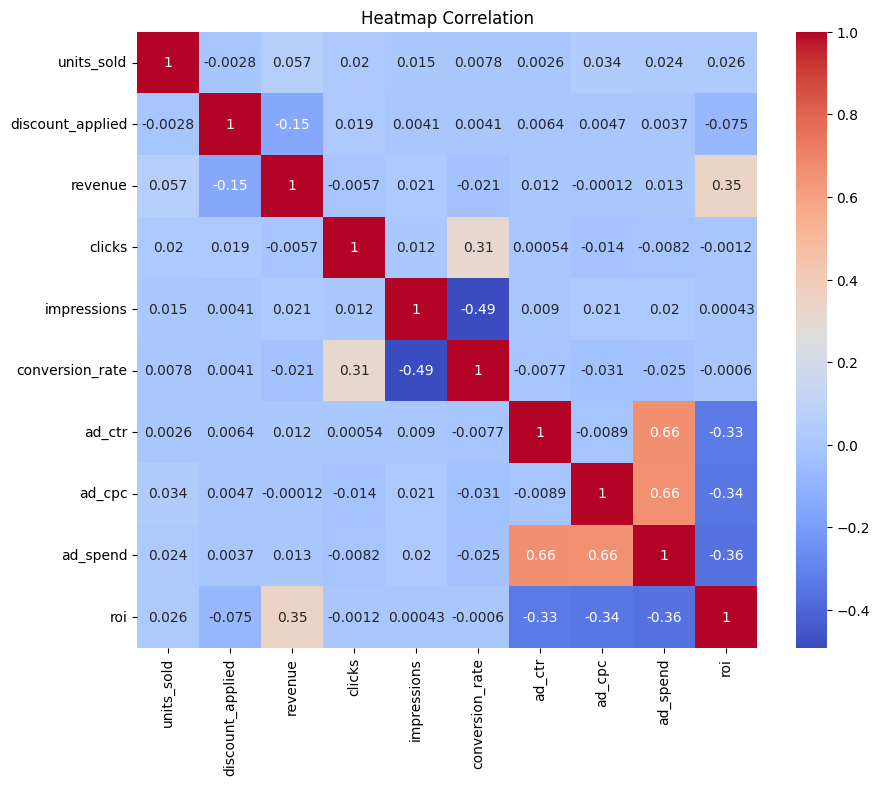

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Heatmap Correlation")
plt.show()

## Numerical Features Distribution

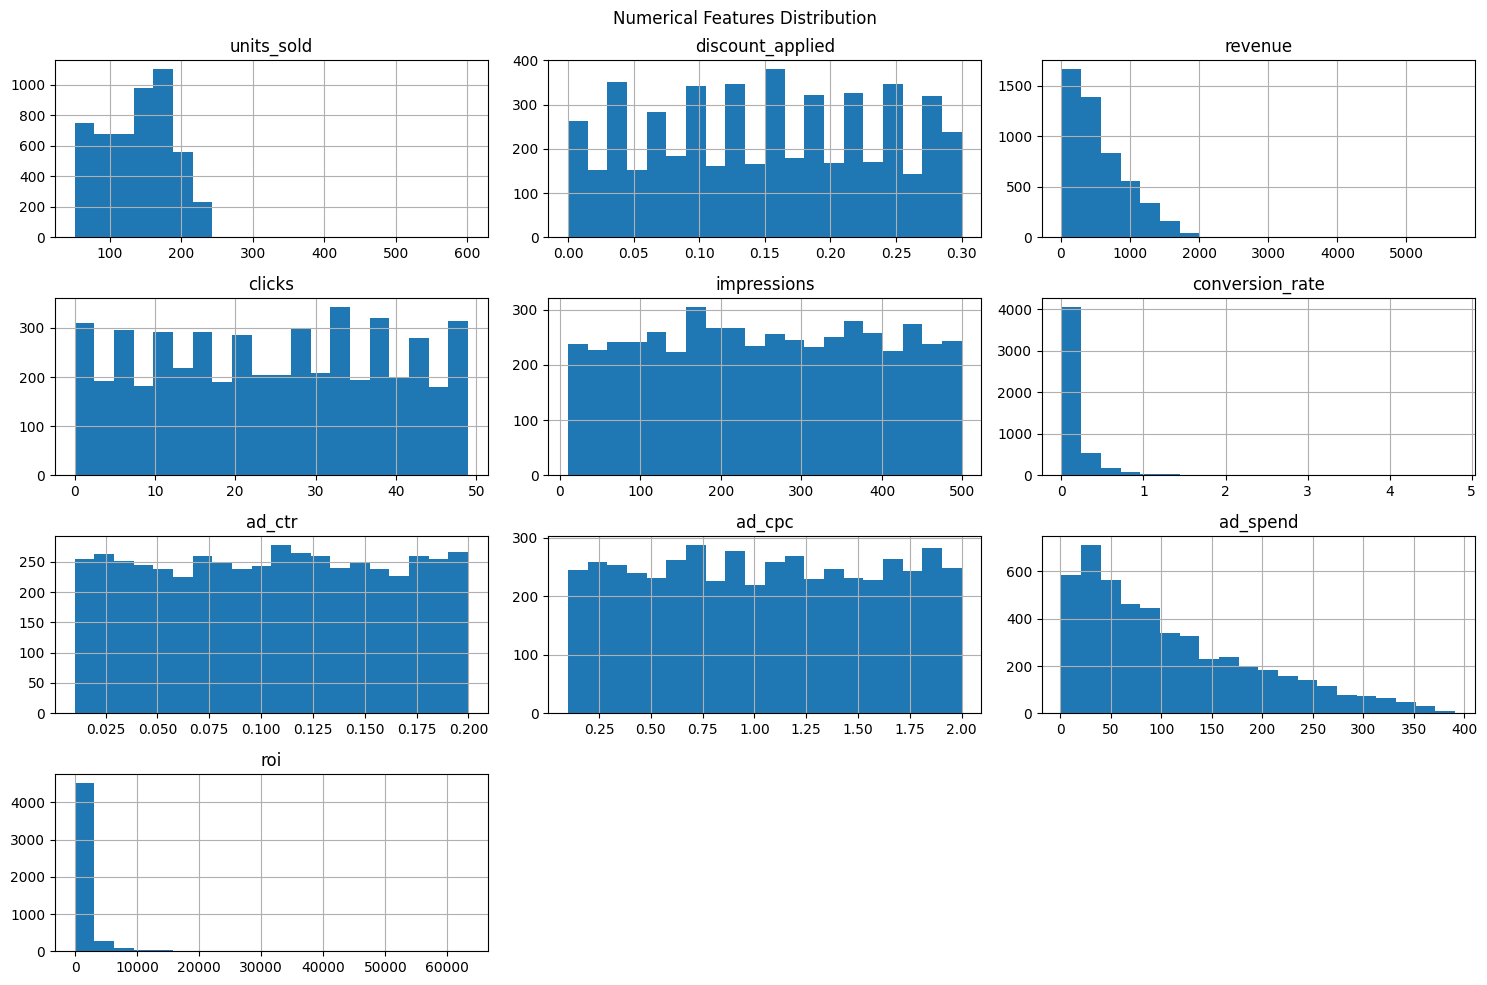

In [31]:
df.hist(figsize=(15, 10), bins=20)
plt.suptitle('Numerical Features Distribution')
plt.tight_layout()
plt.show()

# EDA - Product

## Product Distribution by Category

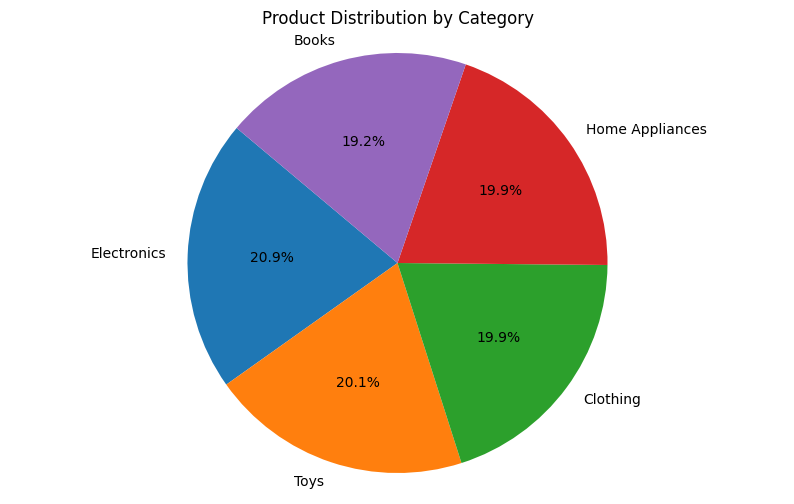

In [64]:
category_counts = df['category'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Product Distribution by Category")
plt.axis('equal')
plt.show()

## Total Revenue per Category

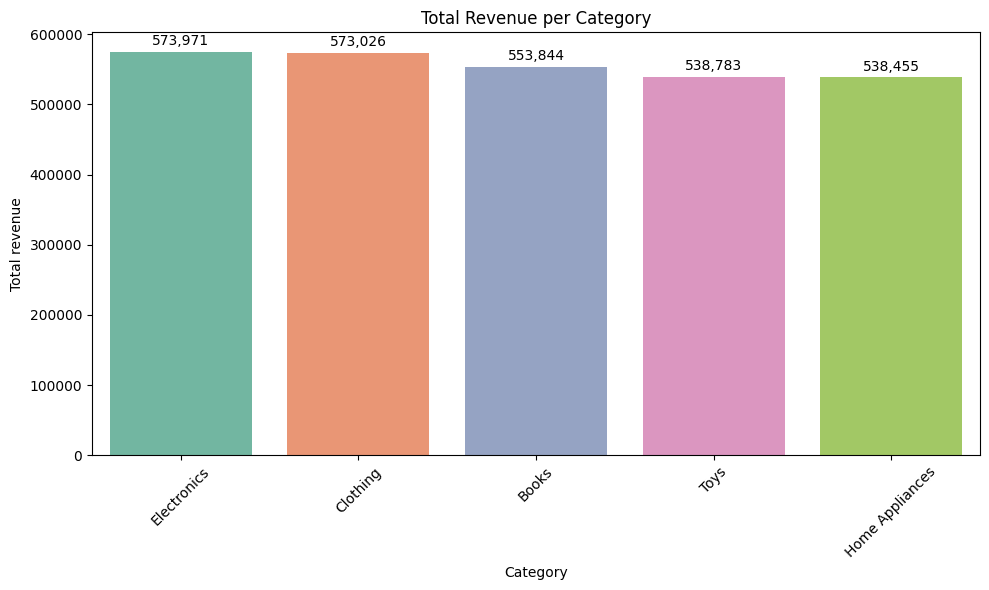

In [71]:
revenue_per_category = df.groupby('category')['revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_per_category.index, y=revenue_per_category.values, palette='Set2')

for i, v in enumerate(revenue_per_category.values):
    plt.text(i, v + v*0.01, f"{v:,.0f}", ha='center', va='bottom', fontsize=10)

plt.title("Total Revenue per Category")
plt.xlabel("Category")
plt.ylabel("Total revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Total Sold per Months

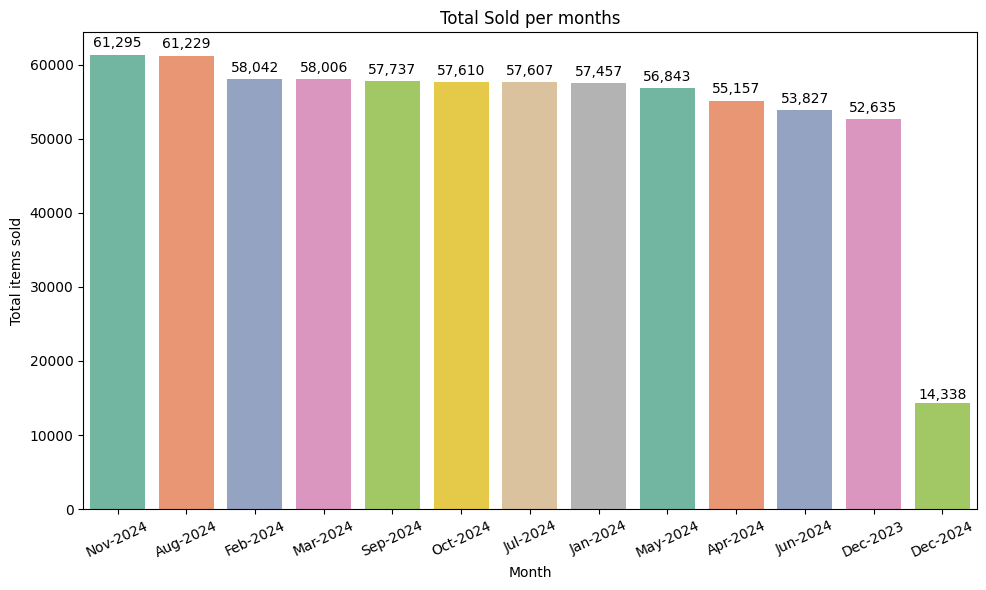

In [57]:
sold_date = df.groupby('transaction_date_update')['units_sold'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sold_date.index, y=sold_date.values, palette='Set2')

for i, v in enumerate(sold_date.values):
    plt.text(i, v + v*0.01, f"{v:,.0f}", ha='center', va='bottom', fontsize=10)

plt.title("Total Sold per months")
plt.xlabel("Month")
plt.ylabel("Total items sold")
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

## Total Sold per Region

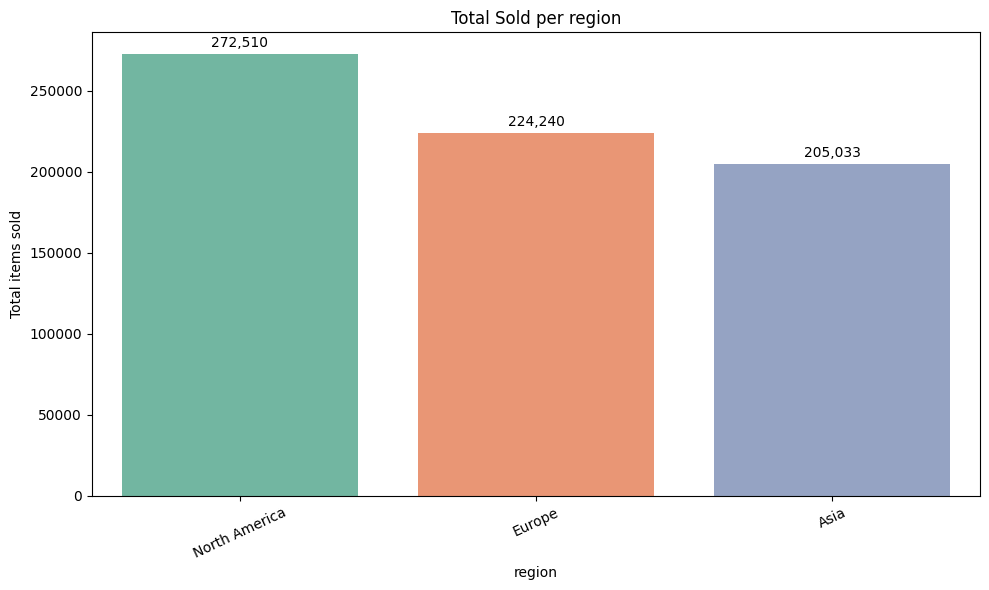

In [60]:
sold_region = df.groupby('region')['units_sold'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sold_region.index, y=sold_region.values, palette='Set2')

for i, v in enumerate(sold_region.values):
    plt.text(i, v + v*0.01, f"{v:,.0f}", ha='center', va='bottom', fontsize=10)

plt.title("Total Sold per region")
plt.xlabel("region")
plt.ylabel("Total items sold")
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

# EDA - Ad

## Total Ad Spend Trend

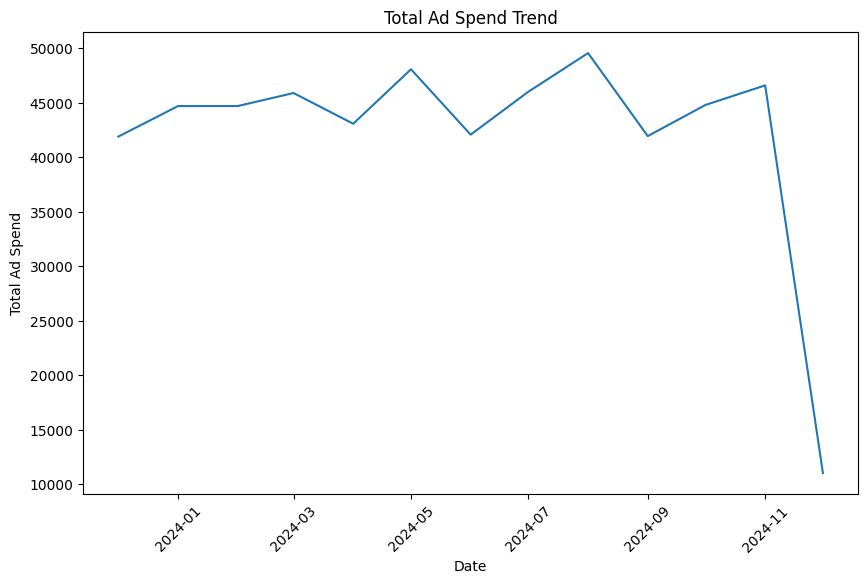

In [84]:
df['transaction_date_update'] = pd.to_datetime(df['transaction_date_update'])
daily_spend = df.groupby('transaction_date_update')['ad_spend'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=daily_spend.index, y=daily_spend.values)
plt.title("Total Ad Spend Trend")
plt.xlabel("Date"); plt.ylabel("Total Ad Spend")
plt.xticks(rotation=45)
plt.show()

## Conversion Rate Trend

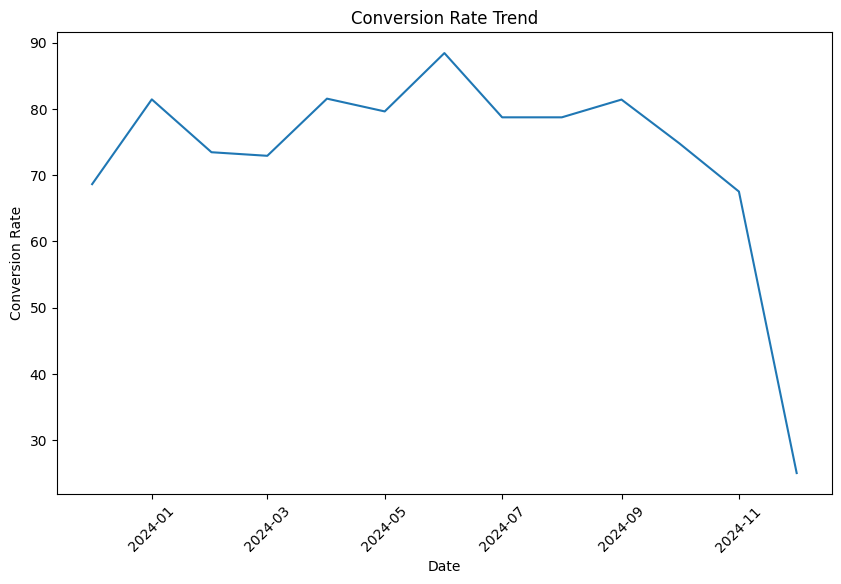

In [89]:
df['transaction_date_update'] = pd.to_datetime(df['transaction_date_update'])
daily_convert = df.groupby('transaction_date_update')['conversion_rate'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=daily_convert.index, y=daily_convert.values)
plt.title("Conversion Rate Trend")
plt.xlabel("Date"); plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)
plt.show()

## Total Ad Spend per Region

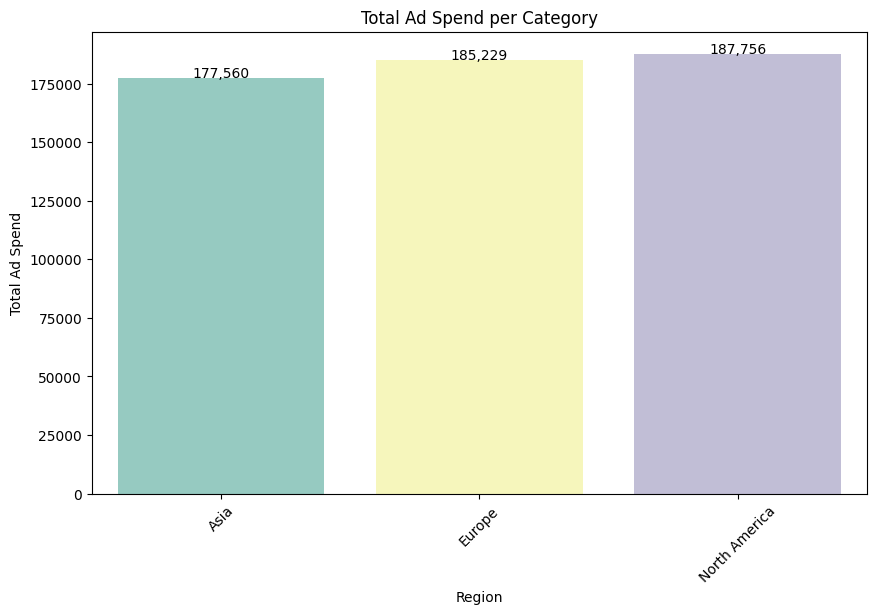

In [91]:
spend_cat = df.groupby('region')['ad_spend'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=spend_cat.index, y=spend_cat.values, palette="Set3")
for i, v in enumerate(spend_cat.values):
    plt.text(i, v + 0.01, f"{v:,.0f}", ha='center')
plt.title("Total Ad Spend per Category")
plt.xlabel("Region"); plt.ylabel("Total Ad Spend")
plt.xticks(rotation=45)
plt.show()

## Conversion Rate per Region

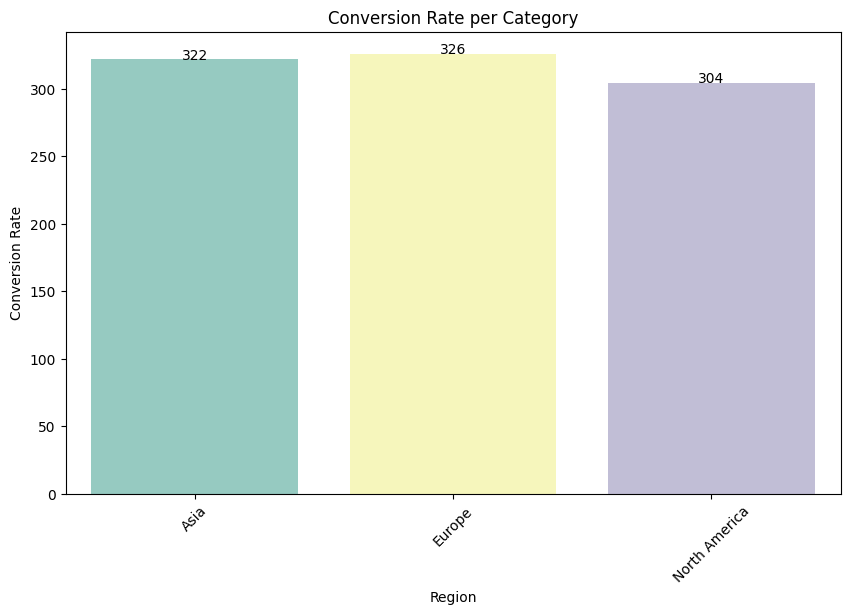

In [92]:
convert_cat = df.groupby('region')['conversion_rate'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=convert_cat.index, y=convert_cat.values, palette="Set3")
for i, v in enumerate(convert_cat.values):
    plt.text(i, v + 0.01, f"{v:,.0f}", ha='center')
plt.title("Conversion Rate per Category")
plt.xlabel("Region"); plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)
plt.show()

## Total Clik per Region

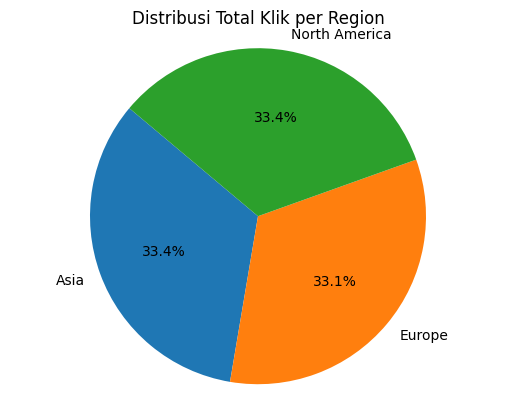

In [73]:
clicks_region = df.groupby('region')['clicks'].sum()

plt.figure(figsize=(10, 6))
plt.pie(clicks_region, labels=clicks_region.index, autopct='%1.1f%%', startangle=140)
plt.title("Total Clik per Region")
plt.axis('equal')
plt.show()